
# ASSIGNED Fit a NN to some data of your choice



CLOSED: <span class="timestamp-wrapper"><span class="timestamp">[2018-12-02 Sun 19:47]</span></span>

:LABEL:    nn-pvap
:POINTS:   3
:TYPE:     homework
:RUBRIC:   default
:RUBRIC\_CATEGORIES: technical, presentation
:RUBRIC\_WEIGHTS: 0.8, 0.2
:DUEDATE:  2018-12-07 23:59:59
:GRADER:   Noriyuki Yoshio

In this paper: Experimental vapor pressure data and a vapor pressure equation for trifluoroiodomethane (CF3I), [https://www.sciencedirect.com/science/article/pii/0378381296030051?via%3Dihub](https://www.sciencedirect.com/science/article/pii/0378381296030051?via%3Dihub), the following data is provided for the vapor pressure as a function of temperature.



In [1]:
import numpy as np

T = np.array([ 243.15,  245.15,  247.15,  249.15,  251.15,  253.15,  255.15,
         257.15,  259.15,  261.15,  263.15,  265.15,  267.15,  269.15,
         271.15,  273.15,  275.15,  277.15,  279.15,  281.15,  283.15,
         285.15,  287.15,  289.15,  291.15,  293.15,  295.15,  297.15,
         299.15,  301.15,  303.15,  305.15,  307.15,  309.15,  311.15,
         313.15,  315.15,  317.15,  319.15,  321.15,  323.15,  325.15,
         327.15,  329.15,  331.15,  333.15,  335.15,  337.15,  339.15,
         341.15,  343.15,  345.15,  347.15,  349.15,  353.15,  358.15,
         363.15,  368.15,  373.15,  378.15,  383.15,  388.15,  393.15])

Pvap = np.array([ 0.0717,  0.0782,  0.0852,  0.0928,  0.1007,  0.1092,  0.1181,
         0.1278,  0.138 ,  0.1488,  0.1603,  0.1722,  0.1851,  0.1986,
         0.2128,  0.228 ,  0.2439,  0.2602,  0.2778,  0.2963,  0.3156,
         0.3359,  0.3572,  0.3795,  0.4027,  0.4269,  0.4522,  0.4785,
         0.5062,  0.5349,  0.565 ,  0.5961,  0.6287,  0.6624,  0.6975,
         0.734 ,  0.7718,  0.8111,  0.8517,  0.8939,  0.9376,  0.9826,
         1.0295,  1.078 ,  1.1282,  1.1802,  1.2337,  1.2891,  1.3461,
         1.4045,  1.4656,  1.5283,  1.5929,  1.6593,  1.7986,  1.9849,
         2.1854,  2.4   ,  2.6303,  2.8777,  3.143 ,  3.4279,  3.7363])

# Out[100]:

Use the material from lecture 21 to develop a simple neural network model for this data. Describe what work you did to avoid overfitting the data, and your analysis about whether the neural network is useful for future predictions of the vapor pressure. Discuss the differences in your model with the one in the paper.




## solution



This is kind of a tricky problem. The setup is easy, but whether it converges or not depends on the initialization, which is somewhat random. Here I used a more explicit form of the neural network, but you could also have used the matrix form. The activation function choice is not important, as long as you get a good fit. The optimization method is also not important; least\_squares, curve\_fit, nlinit, etc. probably all work.



# Out[108]:
# output
`ftol` termination condition is satisfied. 0.00151043162184 [ -3.47571203e-07   3.47571210e-07   0.00000000e+00   0.00000000e+00
   3.47571205e-07   0.00000000e+00   0.00000000e+00  -2.86871892e-07
   2.04556731e-04   6.09782803e-07]
[-1.40871587 -9.2353123  -0.16133809 -0.15824029  2.01550589 -0.10264338
  0.0391223  -5.94314714 -0.01130074  4.81118968]



# image/png

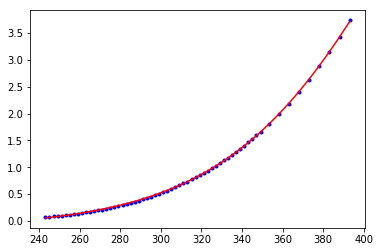

In [1]:
from scipy.optimize import least_squares

def model(x, *pars):
    b1, w10, w00, b00, w11, w01, b01, w12, w02, b02 = pars
    pred = (b1 + w10 * np.tanh(w00 * x + b00)
               + w11 * np.tanh(w01 * x + b01)
               + w12 * np.tanh(w02 * x + b02))
    return pred


def resid(pars):
    return Pvap - model(T, *pars)

pars = least_squares(resid, x0=np.random.randn(10) * 0.1)
print(pars.message, pars.cost, pars.grad)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(T, Pvap, 'b.', T, model(T, *pars.x), 'r-')

print(pars.x)

You should check that the optimizer converged. It is not crucial to print the parameters, but if you don't it is harder to reuse your model later. The model above had 10 parameters, and visually fits the data well. That suggests a smaller model might also work. Next we try one with 7 parameters (only 2 neurons). It is not essential that you follow this specific path, there are other ways you could assess if a simpler model is sufficient.



# Out[109]:
# output
`ftol` termination condition is satisfied. 0.00151043162184 [ -1.63508859e-08   1.17687677e-08  -2.36111238e-05  -1.02763429e-07
   1.63508859e-08   0.00000000e+00   0.00000000e+00]

# text/plain



# image/png

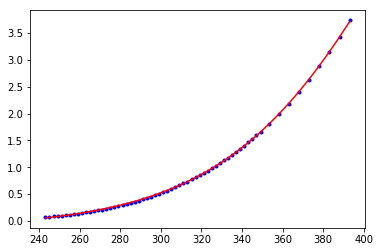

In [1]:
def model(x, *pars):
    b1, w10, w00, b00, w11, w01, b01 = pars
    pred = (b1 + w10 * np.tanh(w00 * x + b00)
               + w11 * np.tanh(w01 * x + b01))
    return pred


def resid(pars):
    return Pvap - model(T, *pars)

pars = least_squares(resid, x0=np.random.randn(7) * 0.1)
print(pars.message, pars.cost, pars.grad)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(T, Pvap, 'b.', T, model(T, *pars.x), 'r-')

This model also has a good fit.

We can compare the results to the paper. Here I compare the residuals of the two models. Now you can see that even though the NN model looks ok, the paper in the model (which is a nonlinear power series type model) has much smaller errors than the NN. It is possible to improve the NN model, e.g. by using more neurons, other activation functions, different initializations, etc.



# Out[113]:




# image/png

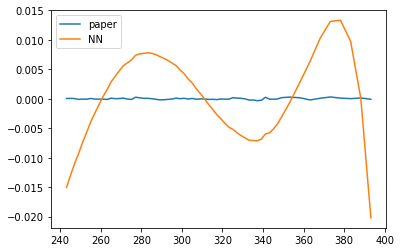

In [1]:
def Pv(T):
    A1 = -7.19045
    A2 = 1.34829
    A3 = -1.58035
    A4 = -5.46680
    Tc = 395.05
    Pc = 3.8617
    tau = 1 - T / Tc
    lnPPc = (A1 * tau + A2 * tau**1.25 + A3 * tau**3 + A4*tau**7) * Tc / T
    Ppc = np.exp(lnPPc)
    return Ppc * Pc

plt.plot(T, Pv(T) - Pvap,  T, model(T, *pars.x) - Pvap)
plt.legend(['paper', 'NN'])

This pattern of residuals indicates inadequacy in the model because the residuals are not normally distributed. There are regions of systematic under and overshooting. 

We can't really say the model in the paper is more interpretable, none of the terms have particular physical significance. There are fewer parameters, and they used scaling of the pressure and temperature as part of the model. We could also do that in the NN, and we might get better performance.

It was not necessary to do this, but here we explore this possibility. curve\_fit hits a maximum function evaluation, but reaches a reasonably low error and fit.



# Out[128]:
# output
The maximum number of function evaluations is exceeded. 1.09024576943e-05 [  3.57175172e-04  -7.34434414e-05  -2.49633460e-03  -3.53614233e-03
  -3.33530876e-04  -6.32193843e-04  -9.23121787e-04]

# text/plain



# image/png

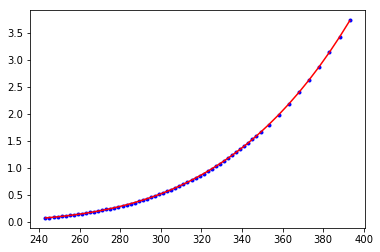

In [1]:
def model(x, *pars):
    b1, w10, w00, b00, w11, w01, b01 = pars
    pred = (b1 + w10 * np.tanh(w00 * x + b00)
               + w11 * np.tanh(w01 * x + b01))
    return pred

Tc = 395.05
Pc = 3.8617

lnPPC = np.log(Pvap / Pc)
Tr = T / Tc

def resid(pars):
    return lnPPC - model(Tr, *pars)

pars = least_squares(resid, x0=np.random.randn(7) * 0.1)
print(pars.message, pars.cost, pars.grad)

plt.plot(T, Pvap, 'b.', Tr * Tc, np.exp(model(Tr, *pars.x)) * Pc, 'r-')

More importantly, this shows that we have significantly reduced the errors especially at lower temperatures. A better optimizer might be able to find a lower error solution to further improve the high temperature errors.



# Out[130]:
# text/plain



# image/png

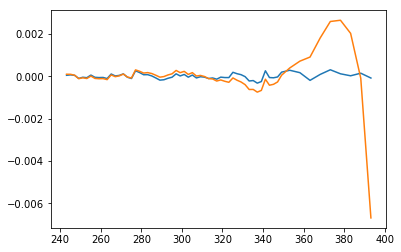

In [1]:
plt.plot(T, Pv(T) - Pvap,  T, np.exp(model(Tr, *pars.x)) * Pc - Pvap)

These residuals are more normally distributed, except at the end where there is structure that indicates an issue with the model.

